# Demand Forecasting & Tier Segmentation

Segment sneakers into demand tiers (High/Medium/Low) using clustering,
then identify what product characteristics drive high demand.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sneaker_intel.data import load_dataset, DatasetType
from sneaker_intel.analysis.demand_forecast import DemandSegmenter, analyze_demand_drivers
from sneaker_intel.visualization.style import apply_nike_style

apply_nike_style()

df = load_dataset(DatasetType.MARKET_2023)
print(f'Shape: {df.shape}')

Shape: (2000, 17)


In [2]:
# Segment into demand tiers
segmenter = DemandSegmenter()
df = segmenter.fit_predict(df)
df['demand_tier'].value_counts()

demand_tier
Low       1665
Medium     322
High        13
Name: count, dtype: int64

In [3]:
# Tier summary
summary = segmenter.get_tier_summary(df)
summary

salesThisPeriod               deadstockSold                 \
                       mean  median count          mean   median count   
demand_tier                                                              
High                1476.00  1293.0    13      77688.69  60925.0    13   
Low                   34.32    22.0  1665       3767.00   2353.0  1665   
Medium               118.41    70.0   322      16401.40  12761.0   322   

            numberOfBids               pricePremium               retail  \
                    mean  median count         mean median count    mean   
demand_tier                                                                
High             1557.69  1241.0    13         0.65   0.53    13  119.23   
Low               140.16   122.0  1665          inf   0.14  1665  141.60   
Medium            453.40   396.5   322         1.28   0.85   322  145.01   

                         lowestAsk               
            median count      mean median count  
demand_tier                                      
High         100.0    13    159.85  139.0    13  
Low          130.0  1665    139.16  125.0  1665  
Medium       130.0   322    252.62  193.0   322

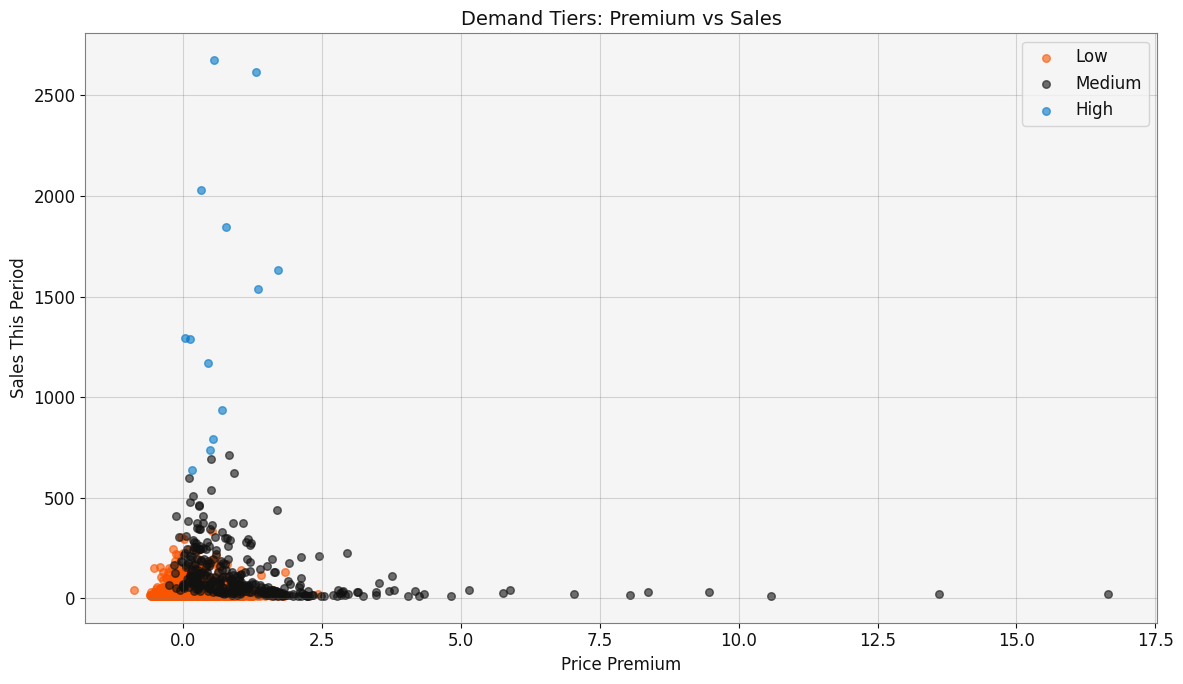

In [4]:
# Scatter: premium vs sales by tier
fig, ax = plt.subplots(figsize=(12, 7))
for tier in ['Low', 'Medium', 'High']:
    subset = df[df['demand_tier'] == tier]
    ax.scatter(subset['pricePremium'], subset['salesThisPeriod'],
               label=tier, alpha=0.6, s=30)
ax.set_xlabel('Price Premium')
ax.set_ylabel('Sales This Period')
ax.set_title('Demand Tiers: Premium vs Sales')
ax.legend()
plt.tight_layout()
plt.show()

In [5]:
# Demand drivers
drivers = analyze_demand_drivers(df)
drivers

,Feature,Importance
0,numberOfBids,0.424055
1,pricePremium,0.278009
2,numberOfAsks,0.181543
3,volatility,0.059295
4,retail,0.057097


In [6]:
# High-demand examples
high_demand = df[df['demand_tier'] == 'High'].nlargest(10, 'salesThisPeriod')
high_demand[['item', 'brand', 'retail', 'salesThisPeriod', 'pricePremium', 'demand_tier']]

,item,brand,retail,salesThisPeriod,pricePremium,demand_tier
0,Jordan 4 Retro SB Pine Green,Jordan,225,2675,0.542,High
1000,adidas Yeezy Foam RNR Onyx,adidas,80,2615,1.300,High
6,Nike Dunk Low Retro White Black Panda (2021),Nike,110,2028,0.318,High
1006,Nike Dunk Low Retro White Black Panda (2021),Nike,110,1845,0.773,High
1007,adidas Yeezy Slide Pure (Restock Pair),adidas,60,1632,1.700,High
1008,adidas Yeezy Slide Onyx,adidas,60,1538,1.333,High
1009,Nike Air Force 1 Low '07 White,Nike,90,1293,0.022,High
1,Jordan 3 Retro White Cement Reimagined,Jordan,210,1289,0.111,High
7,Nike Dunk Low Retro White Black Panda (2021) (...,Nike,100,1168,0.440,High
8,Nike Dunk Low Grey Fog,Nike,100,938,0.690,High
